In [1]:
import numpy as np
import pandas as pd
from py_dss_interface import DSSDLL

# Load irradiance profile from the CSV file
irradiance_data = pd.read_csv(r"D:\Alaa_Selim\Irradiance_Profile_Santa_Clara.csv")
irradiance_profile = irradiance_data['0'].tolist()  # Using the column '0' based on the recent feedback

# Initialize OpenDSS
dss = DSSDLL(r"C:\Program Files\OpenDSS")
dss_file = r"D:\Alaa_Selim\123Bus\IEEE123Master.dss"
dss.text(f"compile [{dss_file}]")

# Define bus names in the IEEE 123 Node Test Feeder
bus_names = [str(i) for i in range(1, 124)]
total_buses = len(bus_names)

# Define PV system and Storage element in OpenDSS
dss.text(f"new PVSystem.PV1 Phases=3 kV=4.16 kVA=500 Pmpp=500")
dss.text(f"new Storage.Battery1 Phases=3 kV=4.16 kVA=100 kWhRated=200")

# Define evaluation function for optimization
def evaluate(pv_bus, battery_bus):
    
    dss.text(f"edit PVSystem.PV1 Bus1={pv_bus}")
    dss.text(f"edit Storage.Battery1 Bus1={battery_bus}")

    total_violations = 0
    total_losses = 0

    for hour, irradiance in enumerate(irradiance_profile, start=1):
        active_power = irradiance * 1000  # Scaled irradiance value
        dss.text(f"edit PVSystem.PV1 Pmpp={active_power}")

        dss.text("Solve")

        voltages = dss.circuit_all_bus_vmag_pu()
        voltage_violations = sum(1 for v in voltages if v < 0.95 or v > 1.05)
        total_violations += voltage_violations

        losses = dss.circuit_losses()[0] * 0.001
        total_losses += losses

        # Progress update for every hour
        #print(f"Hour {hour}/8760 completed for bus {pv_bus}. Violations: {voltage_violations}, Losses: {losses:.2f} kW")
    
    obj_value = total_violations + total_losses
    return obj_value

# Evaluate fitness for all bus pairs where PV and Battery are on the same bus
results = []
for bus in bus_names:
    print(f"\nEvaluating for bus {bus} ({bus_names.index(bus) + 1} of {total_buses})...")
    fitness = evaluate(bus, bus)
    results.append((bus, bus, fitness))

# Sort the results based on fitness
sorted_results = sorted(results, key=lambda x: x[2])

# Output the ranked bus pairs for colocated PV and battery placement
print("\nRanked bus pairs for colocated PV and battery placement:")
for rank, (pv_bus, battery_bus, fitness) in enumerate(sorted_results, 1):
    print(f"Rank {rank}: PV and Battery Bus = {pv_bus}, Fitness = {fitness}")


C:\Users\Alaa\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Alaa\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


OpenDSS Started successfully! 
OpenDSS Version 9.5.1.1 (64-bit build); License Status: Open 



Evaluating for bus 1 (1 of 123)...

Evaluating for bus 2 (2 of 123)...

Evaluating for bus 3 (3 of 123)...

Evaluating for bus 4 (4 of 123)...

Evaluating for bus 5 (5 of 123)...

Evaluating for bus 6 (6 of 123)...

Evaluating for bus 7 (7 of 123)...

Evaluating for bus 8 (8 of 123)...

Evaluating for bus 9 (9 of 123)...

Evaluating for bus 10 (10 of 123)...

Evaluating for bus 11 (11 of 123)...

Evaluating for bus 12 (12 of 123)...

Evaluating for bus 13 (13 of 123)...

Evaluating for bus 14 (14 of 123)...

Evaluating for bus 15 (15 of 123)...

Evaluating for bus 16 (16 of 123)...

Evaluating for bus 17 (17 of 123)...

Evaluating for bus 18 (18 of 123)...

Evaluating for bus 19 (19 of 123)...

Evaluating for bus 20 (20 of 123)...

Evaluating for bus 21 (21 of 123)...

Evaluating for bus 22 (22 of 123)...

Evaluating for bus 23 (23 of 123)...

Evaluating for bus 24 (24 of 123)...

Evaluating

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


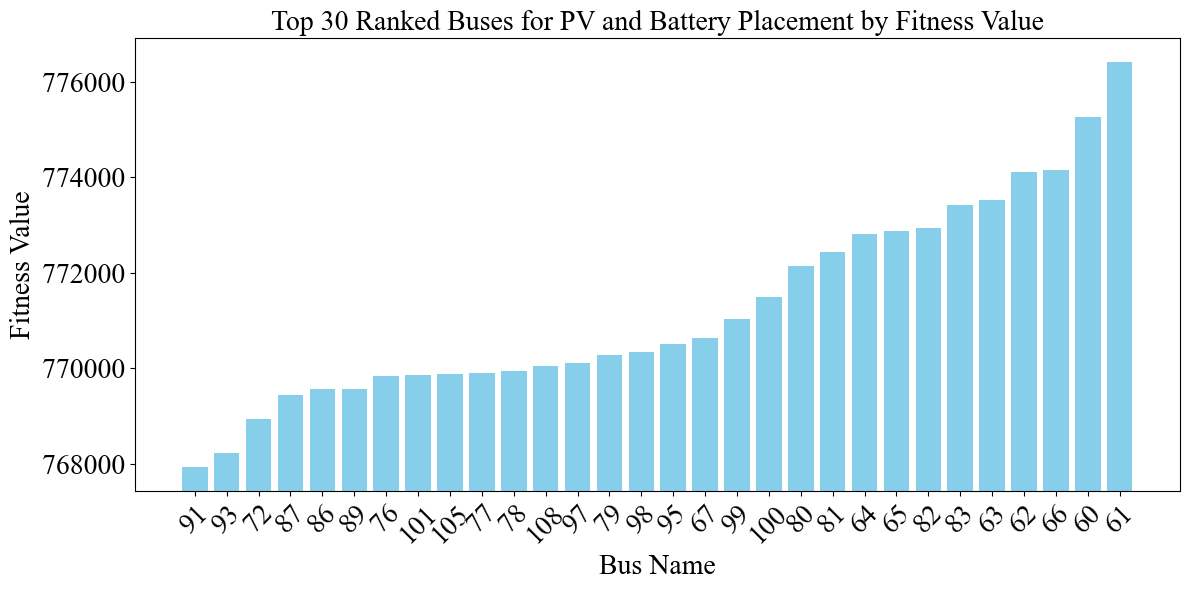

In [6]:
import matplotlib.pyplot as plt

# Data for the ranked buses and fitness values
bus_names = [
    '91', '93', '72', '87', '86', '89', '76', '101', '105', '77',
    '78', '108', '97', '79', '98', '95', '67', '99', '100', '80',
    '81', '64', '65', '82', '83', '63', '62', '66', '60', '61'
]
fitness_values = [
    767927.1792523043, 768218.2607525584, 768940.1524869466, 769437.911067389,
    769566.6490252132, 769573.1172001354, 769829.7063044843, 769861.2578618142,
    769867.3544997065, 769893.9771295819, 769935.4258724926, 770052.1616998138,
    770117.1391347736, 770282.1040966857, 770345.3099827527, 770510.2450189141,
    770622.8056354021, 771026.2234489176, 771501.5729388028, 772141.1308398525,
    772428.1625138222, 772813.5152217229, 772880.0462442872, 772931.1769199179,
    773427.6108358108, 773525.7374588362, 774118.4802593697, 774146.2226052651,
    775264.0079118597, 776412.3939796961
]

# Plotting the bar chart with specified font and size
plt.figure(figsize=(12, 6))
plt.bar(bus_names, fitness_values, color='skyblue')
plt.xlabel("Bus Name", fontname="Times New Roman", fontsize=20)
plt.ylabel("Fitness Value", fontname="Times New Roman", fontsize=20)
plt.title("Top 30 Ranked Buses for PV and Battery Placement by Fitness Value", fontname="Times New Roman", fontsize=20)
plt.xticks(rotation=45, fontname="Times New Roman", fontsize=20)
plt.yticks(fontname="Times New Roman", fontsize=20)
plt.ylim(min(fitness_values) - 500, max(fitness_values) + 500)  # Adjust y-axis scale for clarity

# Save the plot as PDF with tight layout
plt.savefig("top_ranked_buses.pdf", format="pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()


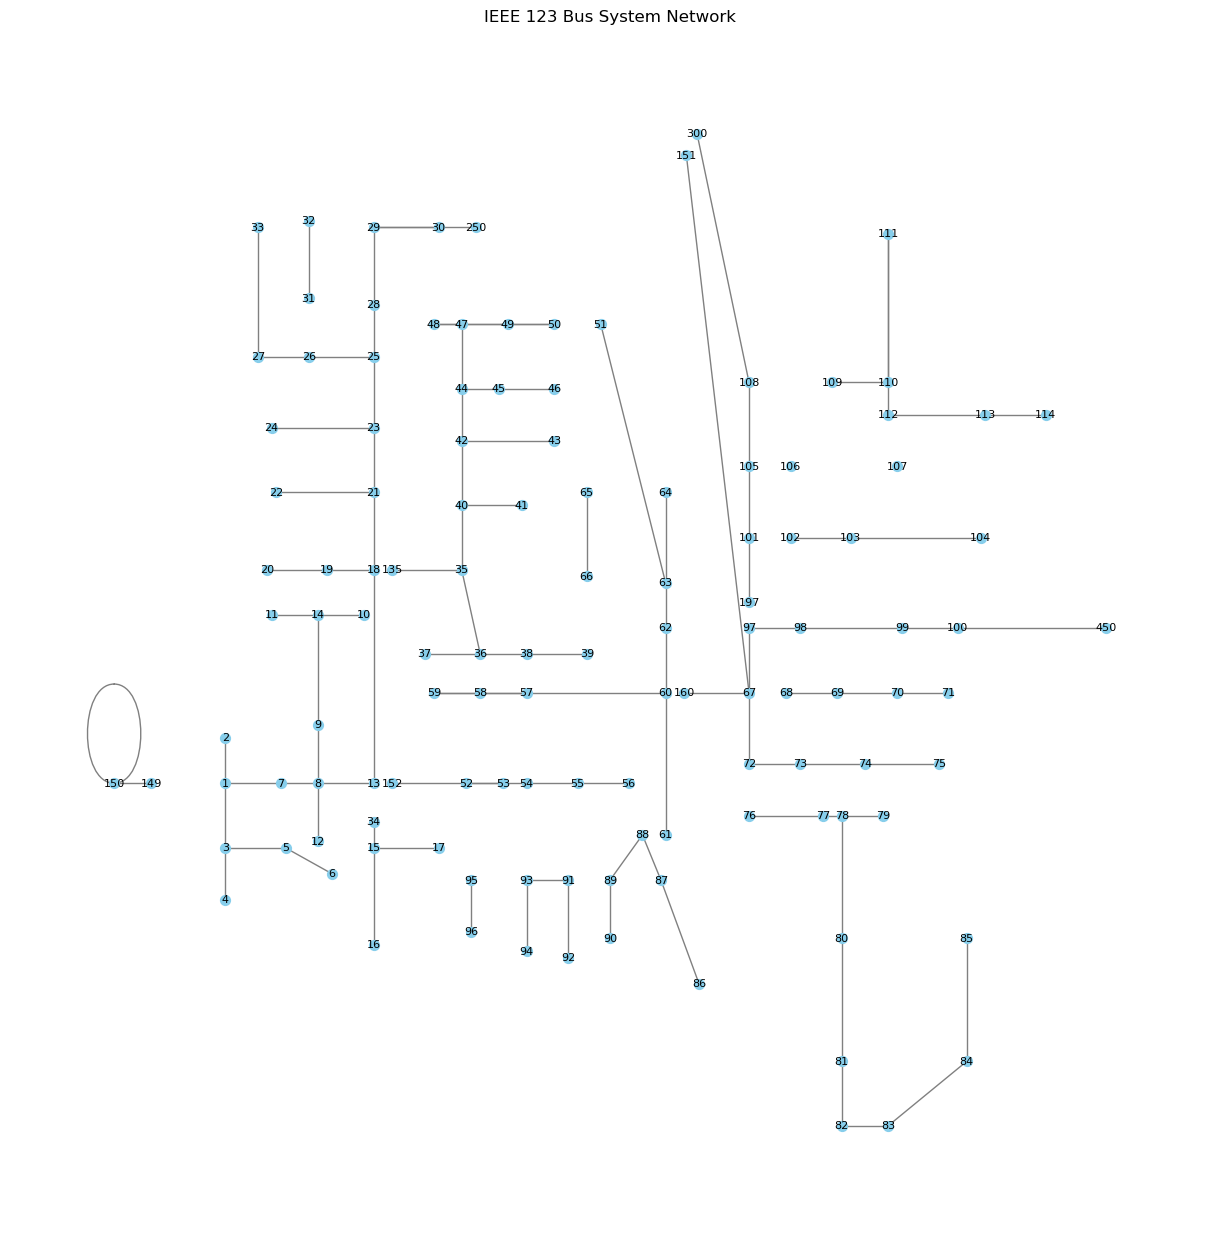

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Define all bus coordinates based on provided data
bus_coordinates = {
    1: (700, 1500), 2: (700, 1675), 3: (700, 1250), 4: (700, 1050), 5: (1025, 1250),
    6: (1275, 1150), 7: (1000, 1500), 8: (1200, 1500), 9: (1200, 1725), 10: (1450, 2150),
    11: (950, 2150), 12: (1200, 1275), 13: (1500, 1500), 14: (1200, 2150), 15: (1500, 1250),
    16: (1500, 875), 17: (1850, 1250), 18: (1500, 2325), 19: (1250, 2325), 20: (925, 2325),
    21: (1500, 2625), 22: (975, 2625), 23: (1500, 2875), 24: (950, 2875), 25: (1500, 3150),
    26: (1150, 3150), 27: (875, 3150), 28: (1500, 3350), 29: (1500, 3650), 30: (1850, 3650),
    31: (1150, 3375), 32: (1150, 3675), 33: (875, 3650), 34: (1500, 1350), 35: (1975, 2325),
    36: (2075, 2000), 37: (1775, 2000), 38: (2325, 2000), 39: (2650, 2000), 40: (1975, 2575),
    41: (2300, 2575), 42: (1975, 2825), 43: (2475, 2825), 44: (1975, 3025), 45: (2175, 3025),
    46: (2475, 3025), 47: (1975, 3275), 48: (1825, 3275), 49: (2225, 3275), 50: (2475, 3275),
    51: (2725, 3275), 52: (2000, 1500), 53: (2200, 1500), 54: (2325, 1500), 55: (2600, 1500),
    56: (2875, 1500), 57: (2325, 1850), 58: (2075, 1850), 59: (1825, 1850), 60: (3075, 1850),
    61: (3075, 1300), 62: (3075, 2100), 63: (3075, 2275), 64: (3075, 2625), 65: (2650, 2625),
    66: (2650, 2300), 67: (3525, 1850), 68: (3725, 1850), 69: (4000, 1850), 70: (4325, 1850),
    71: (4600, 1850), 72: (3525, 1575), 73: (3800, 1575), 74: (4150, 1575), 75: (4550, 1575),
    76: (3525, 1375), 77: (3925, 1375), 78: (4025, 1375), 79: (4250, 1375), 80: (4025, 900),
    81: (4025, 425), 82: (4025, 175), 83: (4275, 175), 84: (4700, 425), 85: (4700, 900),
    86: (3255, 725), 87: (3050, 1125), 88: (2950, 1300), 89: (2775, 1125), 90: (2775, 900),
    91: (2550, 1125), 92: (2550, 825), 93: (2325, 1125), 94: (2325, 850), 95: (2025, 1125),
    96: (2025, 925), 97: (3525, 2100), 98: (3800, 2100), 99: (4350, 2100), 100: (4650, 2100),
    101: (3525, 2450), 102: (3750, 2450), 103: (4075, 2450), 104: (4775, 2450), 105: (3525, 2725),
    106: (3750, 2725), 107: (4325, 2725), 108: (3525, 3050), 109: (3975, 3050), 110: (4275, 3050),
    111: (4275, 3625), 112: (4275, 2925), 113: (4800, 2925), 114: (5125, 2925), 135: (1600, 2325),
    149: (300, 1500), 150: (100, 1500), 151: (3187, 3928), 152: (1600, 1500), 160: (3175, 1850),
    197: (3525, 2200), 250: (2050, 3650), 300: (3245, 4010), 450: (5450, 2100)
}

# Define the line connections between buses
line_connections = [
    (1, 2), (1, 3), (1, 7), (3, 4), (3, 5), (5, 6), (7, 8), (8, 12), (8, 9), (8, 13),
    (9, 14), (13, 18), (14, 10), (14, 11), (15, 16), (15, 17), (18, 19), (18, 21),
    (19, 20), (21, 22), (21, 23), (23, 24), (23, 25), (25, 26), (25, 28), (26, 27),
    (27, 33), (28, 29), (29, 30), (31, 32), (34, 15), (35, 36), (35, 40), (36, 37),
    (36, 38), (38, 39), (40, 41), (40, 42), (42, 43), (42, 44), (44, 45), (44, 47),
    (45, 46), (47, 48), (47, 49), (48, 50), (49, 50), (51, 63), (52, 53), (52, 54),
    (54, 55), (55, 56), (57, 58), (58, 59), (59, 60), (60, 61), (60, 62), (62, 63),
    (63, 64), (65, 66), (67, 72), (67, 97), (68, 69), (69, 70), (70, 71), (72, 73),
    (73, 74), (74, 75), (76, 77), (77, 78), (78, 79), (78, 80), (80, 81), (81, 82),
    (82, 83), (83, 84), (84, 85), (86, 87), (87, 88), (88, 89), (89, 90), (91, 92),
    (91, 93), (93, 94), (95, 96), (97, 98), (98, 99), (99, 100), (101, 105), (102, 103),
    (103, 104), (105, 108), (108, 300), (109, 110), (110, 111), (111, 112), (112,    113), (113, 114), (135, 35), (149, 150), (150, 150), (151, 67), (152, 52), 
    (160, 67), (197, 101), (250, 29), (300, 108), (450, 100)
]

# Initialize the graph
G = nx.Graph()

# Add nodes with positions
for bus, coord in bus_coordinates.items():
    G.add_node(bus, pos=coord)

# Add edges based on line connections
G.add_edges_from(line_connections)

# Draw the network graph
plt.figure(figsize=(12, 12))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, node_color="skyblue", edge_color="gray")

# Title and axis
plt.title("IEEE 123 Bus System Network")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

# Save the plot as a PDF with tight bounding box
plt.savefig("IEEE_123_Bus_System_Network.pdf", format="pdf", bbox_inches="tight")

plt.show()
 


Successfully read C:\Users\Alaa\Documents\OpenDSS Model\OpenDSS Model (08.13.2020)\Bus_coordinates_123.csv.
First few rows of nodes data:
   Bus     X     Y
0    1   700  1500
1    2   700  1675
2    3   700  1250
3    4   700  1050
4    5  1025  1250
Successfully read 125 connections from C:\Users\Alaa\Documents\OpenDSS Model\OpenDSS Model (08.13.2020)\Bus_connections_123.csv.
First few rows of connections data:
  Bus1 Bus2
0    1    2
1    1    3
2    1    7
3    3    4
4    3    5
Switches data:
  Name Bus1 Bus2   State
0  Sw1  150  149    Open
1  Sw2   13  152  Closed
2  Sw3   18  135    Open
3  Sw4   60  160    Open
4  Sw5   97  197  Closed
5  Sw6   61  61s  Closed
6  Sw7  151  300    Open
7  Sw8   54   94    Open
Transformers data:
   Name  Phases                                           Windings
0  XFM1       3  [{'Wdg': 1, 'Bus': '61', 'Conn': 'Delta', 'kv'...
Capacitors data:
   Name Bus1  Phases  kVAR     kV
0   C83   83       3   600  4.160
1  C88a   88       1    50  2.402

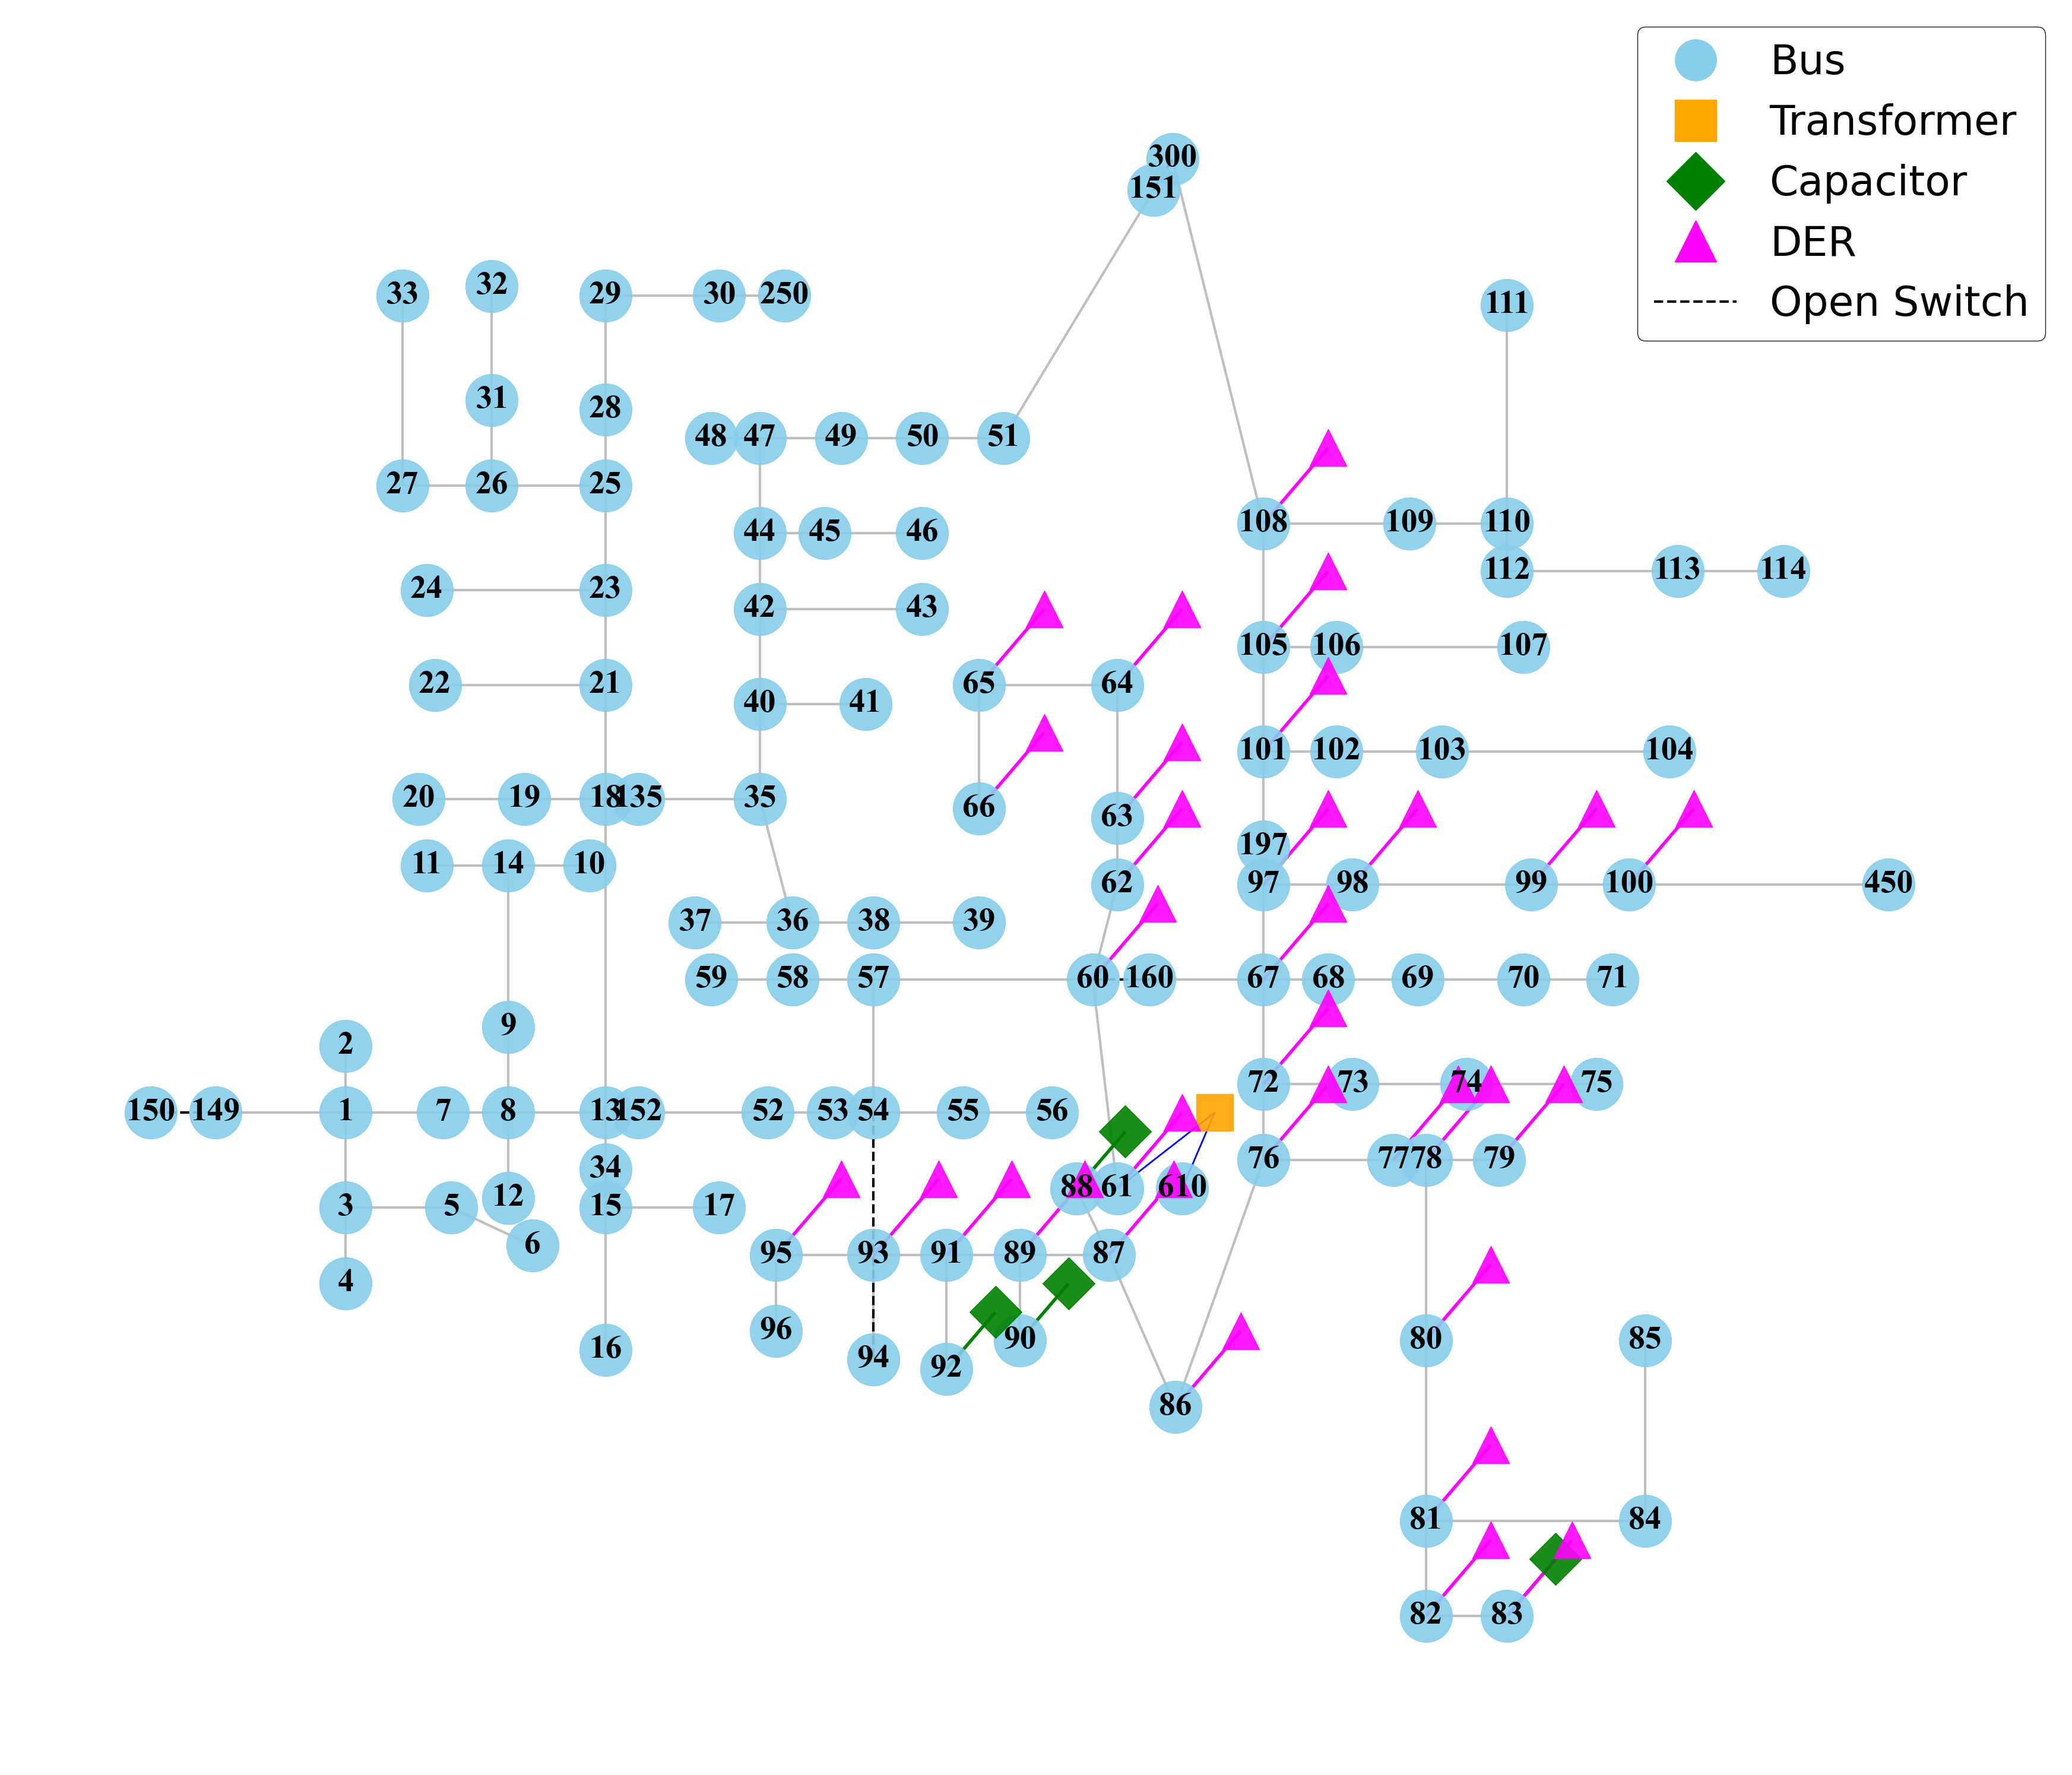

In [107]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D

# ==========================
# Step 1: Define the File Paths
# ==========================

# Define the directory where your CSV files are located
base_dir = r"C:\Users\Alaa\Documents\OpenDSS Model\OpenDSS Model (08.13.2020)"

# Define the full paths to the CSV files
nodes_file = os.path.join(base_dir, 'Bus_coordinates_123.csv')
connections_file = os.path.join(base_dir, 'Bus_connections_123.csv')

# ==========================
# Step 2: Read the Data
# ==========================

# Read nodes data
# Assuming 'Bus_coordinates_123.csv' does NOT have headers and columns are in the order: Bus, X, Y
try:
    nodes_df = pd.read_csv(nodes_file, header=None, names=['Bus', 'X', 'Y'])
    print(f"Successfully read {nodes_file}.")
except FileNotFoundError:
    print(f"Error: The file {nodes_file} was not found.")
    exit(1)
except pd.errors.EmptyDataError:
    print(f"Error: The file {nodes_file} is empty.")
    exit(1)
except pd.errors.ParserError:
    print(f"Error: The file {nodes_file} could not be parsed.")
    exit(1)

# Display first few rows to verify
print("First few rows of nodes data:")
print(nodes_df.head())

# Read connections data
# This parser handles both comma-separated and space-separated connection lines
connections = []
try:
    with open(connections_file, 'r') as f:
        for line_num, line in enumerate(f, 1):
            line = line.strip()
            if not line:
                print(f"Warning: Skipping empty line at line {line_num}.")
                continue  # Skip empty lines
            # Determine the delimiter: comma or space
            if ',' in line:
                parts = line.split(',')
            else:
                parts = line.split()
            if len(parts) != 2:
                print(f"Warning: Skipping malformed line {line_num}: {line}")
                continue  # Skip malformed lines
            try:
                bus1_part, bus2_part = parts
                # Extract the number after '='
                bus1 = bus1_part.split('=')[1].strip()
                bus2 = bus2_part.split('=')[1].strip()
                connections.append({'Bus1': bus1, 'Bus2': bus2})
            except IndexError:
                print(f"Warning: Skipping malformed line {line_num}: {line}")
                continue  # Skip lines that don't have expected format
except FileNotFoundError:
    print(f"Error: The file {connections_file} was not found.")
    exit(1)

if not connections:
    print("Error: No valid connections found in the connections file.")
    exit(1)
else:
    print(f"Successfully read {len(connections)} connections from {connections_file}.")

connections_df = pd.DataFrame(connections)

# Display first few rows to verify
print("First few rows of connections data:")
print(connections_df.head())

# ==========================
# Step 3: Define Switches, Transformer, Capacitors, and DERs
# ==========================

# Define switches with their initial states (all Closed)
switches = [
    {'Name': 'Sw1', 'Bus1': '150', 'Bus2': '149', 'State': 'Closed'},
    {'Name': 'Sw2', 'Bus1': '13', 'Bus2': '152', 'State': 'Closed'},
    {'Name': 'Sw3', 'Bus1': '18', 'Bus2': '135', 'State': 'Closed'},
    {'Name': 'Sw4', 'Bus1': '60', 'Bus2': '160', 'State': 'Closed'},
    {'Name': 'Sw5', 'Bus1': '97', 'Bus2': '197', 'State': 'Closed'},
    {'Name': 'Sw6', 'Bus1': '61', 'Bus2': '61s', 'State': 'Closed'},
    {'Name': 'Sw7', 'Bus1': '151', 'Bus2': '300', 'State': 'Closed'},
    {'Name': 'Sw8', 'Bus1': '54', 'Bus2': '94', 'State': 'Closed'},
]

# Update specific switches to Open as per user request
open_switch_pairs = [
    ('150', '149'),
    ('151', '300'),
    ('18', '135'),
    ('94', '54'),
    ('60', '160'),
]

for switch in switches:
    if (switch['Bus1'], switch['Bus2']) in open_switch_pairs or (switch['Bus2'], switch['Bus1']) in open_switch_pairs:
        switch['State'] = 'Open'

switches_df = pd.DataFrame(switches)

print("Switches data:")
print(switches_df)

# Define transformers
transformers = [
    {
        'Name': 'XFM1',
        'Phases': 3,
        'Windings': [
            {'Wdg': 1, 'Bus': '61', 'Conn': 'Delta', 'kv': 4.16, 'kva': 150, '%r': 0.635},
            {'Wdg': 2, 'Bus': '610', 'Conn': 'Delta', 'kv': 0.48, 'kva': 150, '%r': 0.635},
        ]
    }
]

transformers_df = pd.DataFrame(transformers)

print("Transformers data:")
print(transformers_df)

# Define capacitors
capacitors = [
    {'Name': 'C83', 'Bus1': '83', 'Phases': 3, 'kVAR': 600, 'kV': 4.16},
    {'Name': 'C88a', 'Bus1': '88', 'Phases': 1, 'kVAR': 50, 'kV': 2.402},
    {'Name': 'C90b', 'Bus1': '90', 'Phases': 1, 'kVAR': 50, 'kV': 2.402},
    {'Name': 'C92c', 'Bus1': '92', 'Phases': 1, 'kVAR': 50, 'kV': 2.402},
]

capacitors_df = pd.DataFrame(capacitors)

print("Capacitors data:")
print(capacitors_df)

# Define DERs at specified buses
bus_names = [
    '91', '93', '72', '87', '86', '89', '76', '101', '105', '77',
    '78', '108', '97', '79', '98', '95', '67', '99', '100', '80',
    '81', '64', '65', '82', '83', '63', '62', '66', '60', '61'
]

# ==========================
# Step 4: Merge Switches into Connections
# ==========================

# Add a 'Switch' column to connections_df indicating if the connection is a switch
connections_df['Switch'] = False
connections_df['State'] = 'Closed'  # Default state

# Iterate over switches and mark connections accordingly
for idx, switch in switches_df.iterrows():
    bus1 = switch['Bus1']
    bus2 = switch['Bus2']
    state = switch['State']
    
    # Find the connection and update its attributes
    mask = ((connections_df['Bus1'] == bus1) & (connections_df['Bus2'] == bus2)) | \
           ((connections_df['Bus1'] == bus2) & (connections_df['Bus2'] == bus1))
    if mask.any():
        connections_df.loc[mask, 'Switch'] = True
        connections_df.loc[mask, 'State'] = state
    else:
        print(f"Warning: Switch '{switch['Name']}' between Bus '{bus1}' and Bus '{bus2}' not found in connections. Skipping.")

# ==========================
# Step 5: Create the Graph
# ==========================

G = nx.Graph()

# Add all bus nodes from nodes_df
for idx, row in nodes_df.iterrows():
    G.add_node(str(row['Bus']), pos=(row['X'], row['Y']))

print(f"Added {G.number_of_nodes()} bus nodes to the graph.")

# Add regular connections as edges
for idx, row in connections_df.iterrows():
    bus1 = str(row['Bus1'])
    bus2 = str(row['Bus2'])
    is_switch = row['Switch']
    state = row['State']
    
    if bus1 not in G.nodes or bus2 not in G.nodes:
        print(f"Warning: Bus '{bus1}' or Bus '{bus2}' not found in nodes. Skipping connection.")
        continue
    
    G.add_edge(bus1, bus2, type='Switch' if is_switch else 'Connection', state=state if is_switch else 'Closed')

print(f"Added {len([e for e in G.edges(data=True) if e[2].get('type') == 'Connection'])} regular connections to the graph.")
print(f"Added {len([e for e in G.edges(data=True) if e[2].get('type') == 'Switch' and e[2].get('state') == 'Open'])} open switches to the graph.")

# ==========================
# Step 6: Add Transformers, Capacitors, and DERs as Nodes Connected to Buses
# ==========================

# Add transformers
for idx, transformer in transformers_df.iterrows():
    transformer_name = transformer['Name']
    G.add_node(transformer_name, pos=(0, 0))  # Temporary position; will be updated
    windings = transformer['Windings']
    
    connected_positions = []
    for winding in windings:
        bus = str(winding['Bus'])
        if bus not in G.nodes:
            print(f"Warning: Bus '{bus}' not found in nodes. Skipping connection to transformer '{transformer_name}'.")
            continue
        # Add edge from transformer to bus
        G.add_edge(transformer_name, bus, type='Transformer', winding=winding['Wdg'])
        # Collect positions to calculate transformer position
        connected_positions.append(G.nodes[bus]['pos'])
    
    if connected_positions:
        # Calculate transformer position as the average of connected bus positions with increased offset
        avg_x = sum(pos[0] for pos in connected_positions) / len(connected_positions)
        avg_y = sum(pos[1] for pos in connected_positions) / len(connected_positions)
        # Apply additional offset to position transformer further away
        offset_x = 200  # Further increased offset
        offset_y = 200
        G.nodes[transformer_name]['pos'] = (avg_x + offset_x, avg_y + offset_y)
    else:
        # If no connected buses, set default position
        G.nodes[transformer_name]['pos'] = (0, 0)

print(f"Added {len(transformers_df)} transformers to the graph.")

# Add capacitors
for idx, capacitor in capacitors_df.iterrows():
    capacitor_name = f"C{capacitor['Name']}"
    bus = str(capacitor['Bus1'])
    G.add_node(capacitor_name, pos=(0, 0))  # Temporary position; will be updated
    if bus not in G.nodes:
        print(f"Warning: Bus '{bus}' not found in nodes. Skipping capacitor '{capacitor_name}'.")
        continue
    # Add edge from capacitor to bus
    G.add_edge(capacitor_name, bus, type='Capacitor', kVAR=capacitor['kVAR'], kV=capacitor['kV'])
    # Set capacitor position slightly offset from the bus to avoid overlap with switches and other components
    bus_pos = G.nodes[bus]['pos']
    capacitor_pos = (bus_pos[0] + 150, bus_pos[1] + 150)  # Increased offset for better visibility
    G.nodes[capacitor_name]['pos'] = capacitor_pos

print(f"Added {len(capacitors_df)} capacitors to the graph.")

# Add DERs
for bus in bus_names:
    der_name = f"DER_{bus}"
    G.add_node(der_name, pos=(0, 0))  # Temporary position; will be updated
    if bus not in G.nodes:
        print(f"Warning: Bus '{bus}' not found in nodes. Skipping DER '{der_name}'.")
        continue
    # Add edge from DER to bus
    G.add_edge(der_name, bus, type='DER')
    # Set DER position slightly offset from the bus to avoid overlap
    bus_pos = G.nodes[bus]['pos']
    der_pos = (bus_pos[0] + 200, bus_pos[1] + 200)  # Further increased offset for better visibility
    G.nodes[der_name]['pos'] = der_pos

print(f"Added {len(bus_names)} DERs to the graph.")

# ==========================
# Step 7: Plot Customizations
# ==========================

plt.figure(figsize=(35,30))  # Increased figure size for better visibility


# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw regular connections
regular_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'Connection']
nx.draw_networkx_edges(
    G, pos,
    edgelist=regular_edges,
    edge_color='gray',
    alpha=0.5,
    width=3,
)

# Draw open switches with distinct styles
open_switch_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'Switch' and d.get('state') == 'Open']
nx.draw_networkx_edges(
    G, pos,
    edgelist=open_switch_edges,
    edge_color='black',
    style='--',  # Dashed lines for open switches
    width=3,
)

# Draw transformer connections
transformer_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'Transformer']
nx.draw_networkx_edges(
    G, pos,
    edgelist=transformer_edges,
    edge_color='blue',
    style='solid',
    width=2,
)

# Draw capacitor connections
capacitor_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'Capacitor']
nx.draw_networkx_edges(
    G, pos,
    edgelist=capacitor_edges,
    edge_color='green',
    style='solid',
    width=4,
)

# Draw DER connections
der_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'DER']
nx.draw_networkx_edges(
    G, pos,
    edgelist=der_edges,
    edge_color='magenta',
    style='solid',
    width=4,
)

# Draw all bus nodes with increased size and uniform color
bus_nodes = [node for node, attr in G.nodes(data=True) if node.isdigit() or node.endswith(('r', 's'))]
bus_node_size = 4000  # Increased node size for buses
nx.draw_networkx_nodes(
    G, pos,
    nodelist=bus_nodes,
    node_size=bus_node_size,
    node_color='skyblue',
    alpha=0.9,
    label='Bus'
)

# Draw transformer nodes with distinct color and shape (Included in legend)
transformer_nodes = [node for node, attr in G.nodes(data=True) if node.startswith('XFM')]
transformer_node_size = 2000  # Increased node size for transformers
nx.draw_networkx_nodes(
    G, pos,
    nodelist=transformer_nodes,
    node_size=transformer_node_size,
    node_color='orange',
    node_shape='s',  # Square shape for transformers
    alpha=0.9,
    label='Transformer'
)

# Draw capacitor nodes with distinct color and shape (Included in legend)
capacitor_nodes = [node for node, attr in G.nodes(data=True) if node.startswith('C')]
capacitor_node_size = 2000  # Increased node size for capacitors
nx.draw_networkx_nodes(
    G, pos,
    nodelist=capacitor_nodes,
    node_size=capacitor_node_size,
    node_color='green',
    node_shape='D',  # Diamond shape for capacitors
    alpha=0.9,
    label='Capacitor'
)

# Draw DER nodes with distinct color and shape (Included in legend)
der_nodes = [node for node, attr in G.nodes(data=True) if node.startswith('DER')]
der_node_size = 2000  # Increased node size for DERs
nx.draw_networkx_nodes(
    G, pos,
    nodelist=der_nodes,
    node_size=der_node_size,
    node_color='magenta',
    node_shape='^',  # Triangle shape for DERs
    alpha=0.9,
    label='DER'
)

# Draw labels only for Bus nodes with increased font size
labels = {node: node for node in G.nodes() if node.isdigit() or node.endswith(('r', 's'))}
nx.draw_networkx_labels(
    G, pos,
    labels=labels,
    font_size=40,  # Increased font size for bus labels
    font_family='Times New Roman',
    font_weight='bold'
)

# ==========================
# Step 8: Create the Legend
# ==========================

# Define legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='skyblue', label='Bus', markersize=50, linestyle='None'),
    Line2D([0], [0], marker='s', color='orange', label='Transformer', markersize=50, linestyle='None'),
    Line2D([0], [0], marker='D', color='green', label='Capacitor', markersize=50, linestyle='None'),
    Line2D([0], [0], marker='^', color='magenta', label='DER', markersize=50, linestyle='None'),
    Line2D([0], [0], color='black', linewidth=3, linestyle='--', label='Open Switch'),
]

# Create the legend
plt.legend(handles=legend_elements, loc='upper right', fontsize=50,
           frameon=True, framealpha=0.9, edgecolor='black')

# Remove axes
plt.axis('off')

# Enhance layout
plt.tight_layout()

# ==========================
# Step 9: Save the Plot as PDF
# ==========================

# Save the plot as a PDF file
output_image = os.path.join(base_dir, 'IEEE_123_Bus_System_with_Open_Switches_Capacitors_DERs_and_Transformer.pdf')
plt.savefig(output_image, format='pdf', bbox_inches='tight')
print(f"Plot saved as {output_image}")

# Show plot
plt.show()


Successfully read C:\Users\Alaa\Documents\OpenDSS Model\OpenDSS Model (08.13.2020)\Bus_coordinates_123.csv.
First few rows of nodes data:
   Bus     X     Y
0    1   700  1500
1    2   700  1675
2    3   700  1250
3    4   700  1050
4    5  1025  1250
Successfully read 125 connections from C:\Users\Alaa\Documents\OpenDSS Model\OpenDSS Model (08.13.2020)\Bus_connections_123.csv.
First few rows of connections data:
  Bus1 Bus2
0    1    2
1    1    3
2    1    7
3    3    4
4    3    5
Switches data:
  Name Bus1 Bus2   State
0  Sw1  150  149    Open
1  Sw2   13  152    Open
2  Sw3   18  135    Open
3  Sw4   60  160    Open
4  Sw5   97  197  Closed
5  Sw6   61  61s  Closed
6  Sw7  151  300    Open
7  Sw8   54   94    Open
Transformers data:
   Name  Phases                                           Windings
0  XFM1       3  [{'Wdg': 1, 'Bus': '61', 'Conn': 'Delta', 'kv'...
Capacitors data:
   Name Bus1  Phases  kVAR     kV
0   C83   83       3   600  4.160
1  C88a   88       1    50  2.402

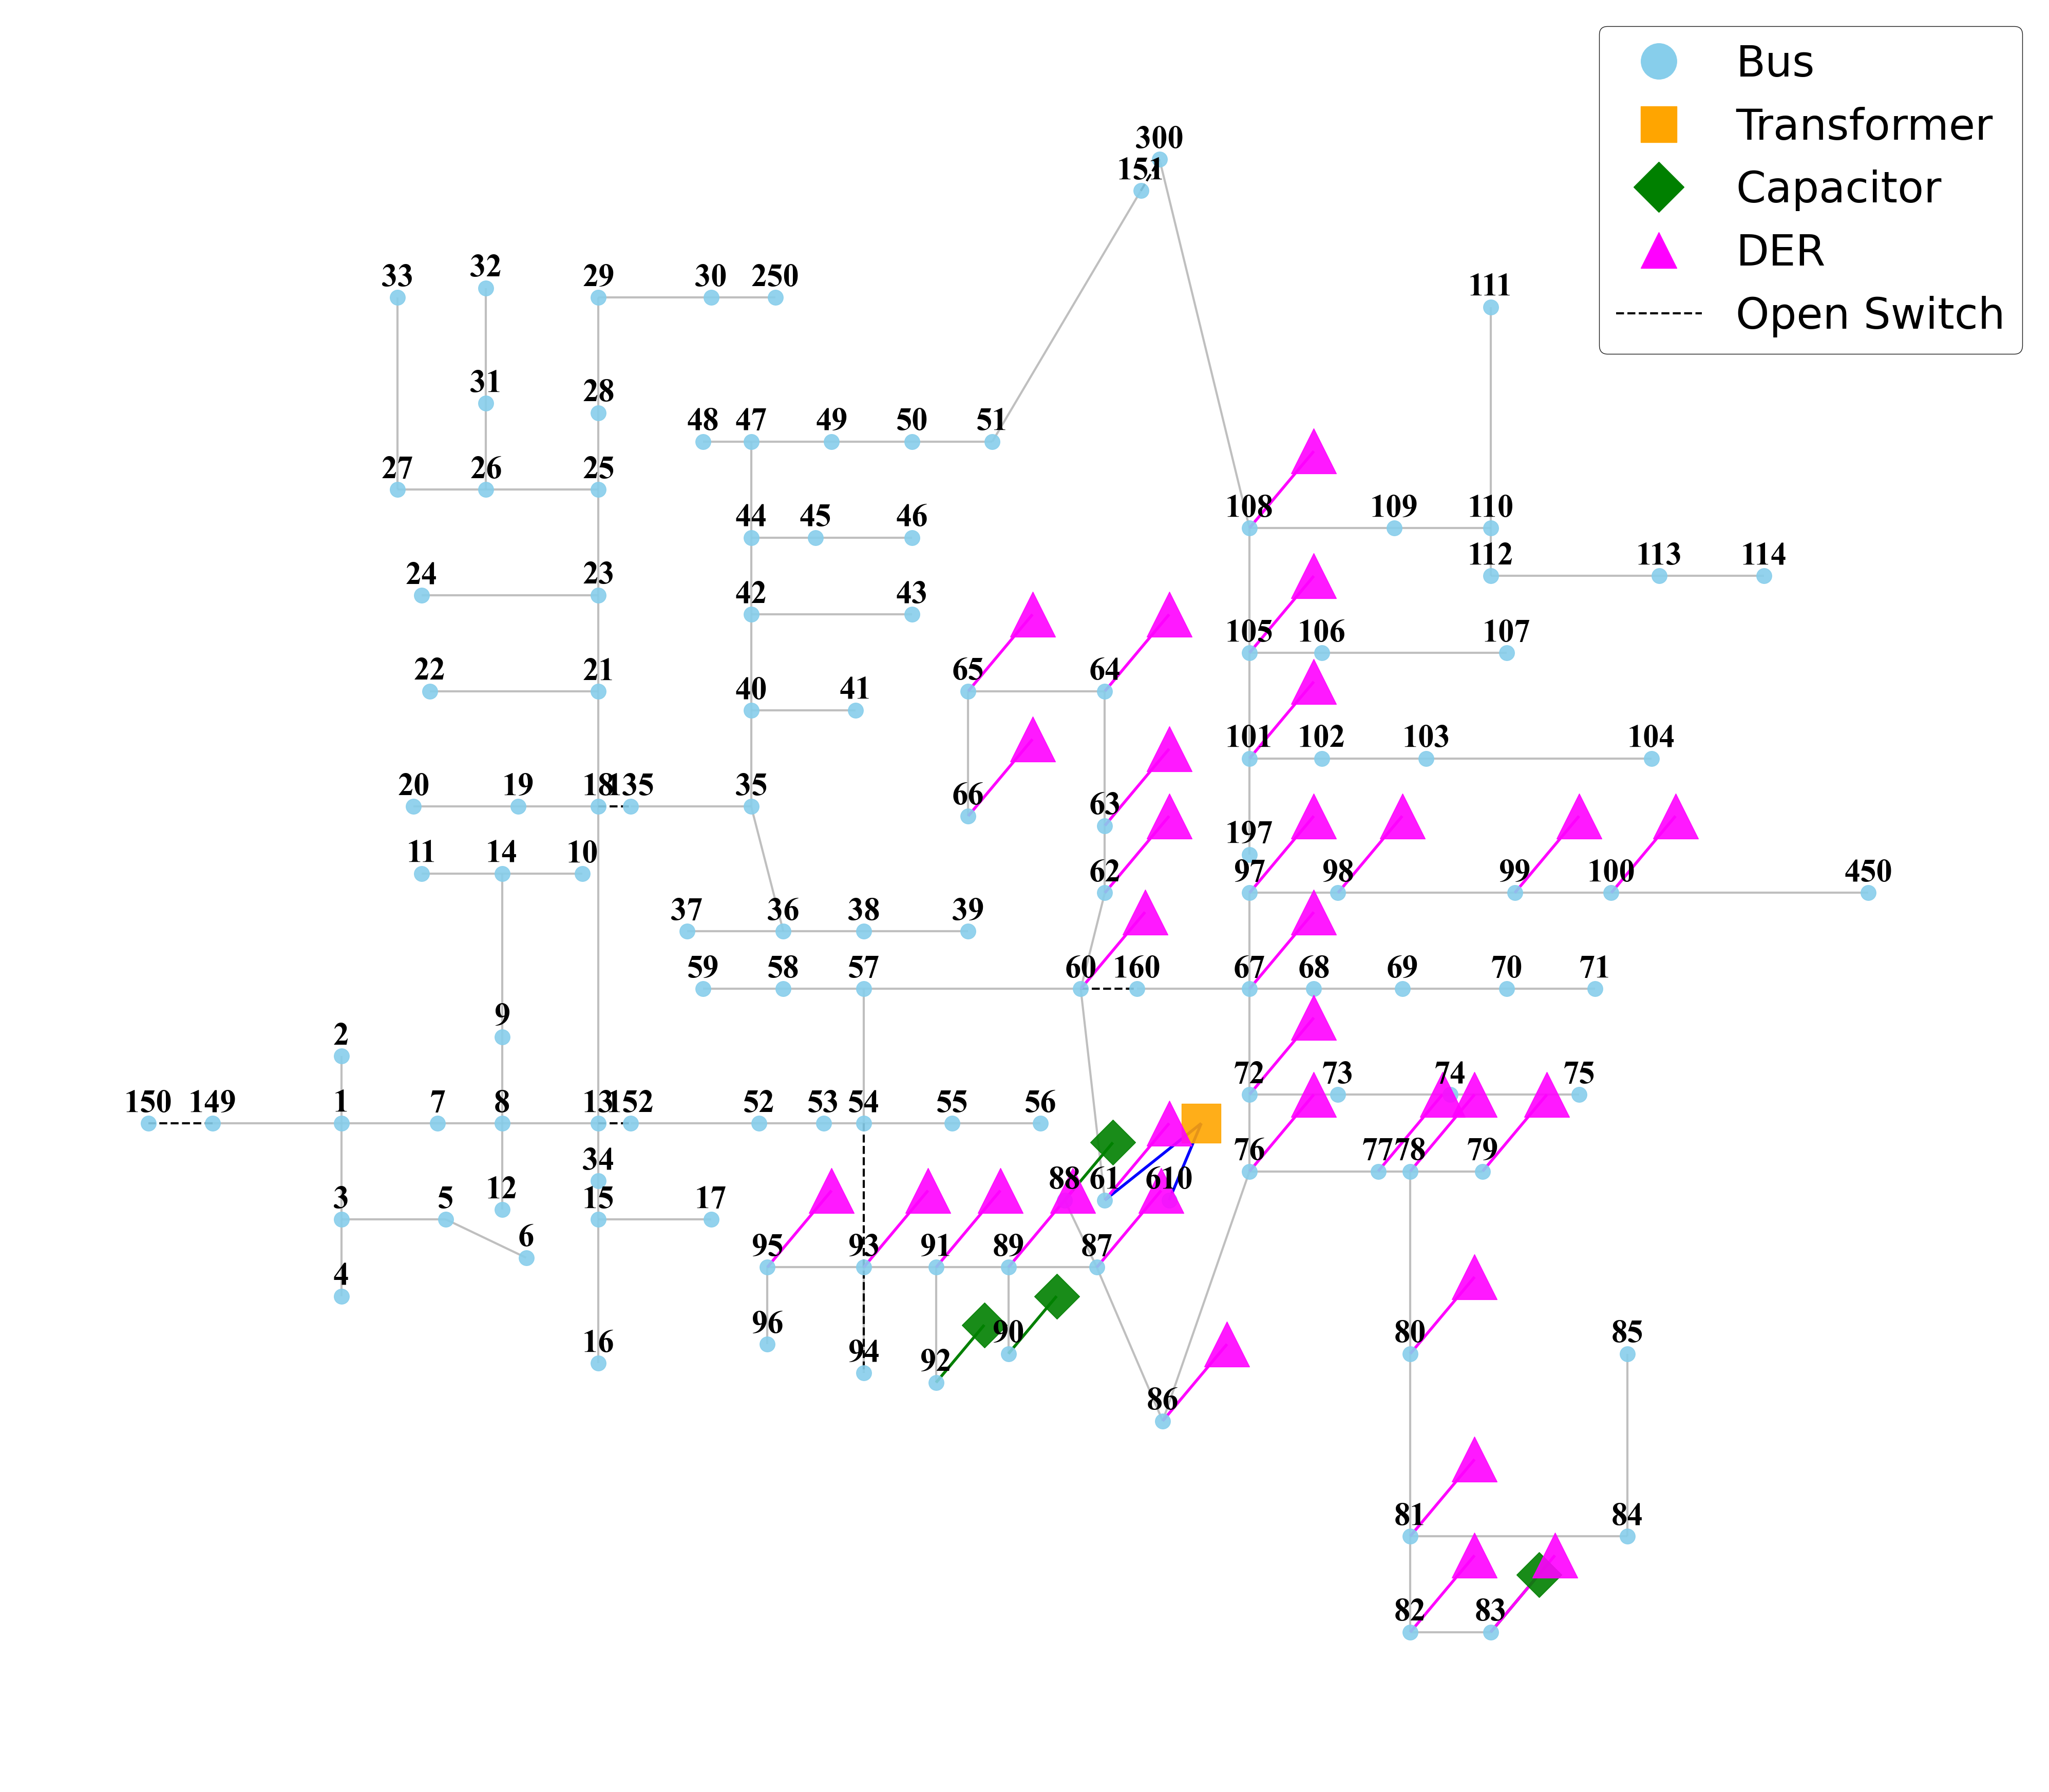

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D

# ==========================
# Step 1: Define the File Paths
# ==========================

# Define the directory where your CSV files are located
base_dir = r"C:\Users\Alaa\Documents\OpenDSS Model\OpenDSS Model (08.13.2020)"

# Define the full paths to the CSV files
nodes_file = os.path.join(base_dir, 'Bus_coordinates_123.csv')
connections_file = os.path.join(base_dir, 'Bus_connections_123.csv')

# ==========================
# Step 2: Read the Data
# ==========================

# Read nodes data
# Assuming 'Bus_coordinates_123.csv' does NOT have headers and columns are in the order: Bus, X, Y
try:
    nodes_df = pd.read_csv(nodes_file, header=None, names=['Bus', 'X', 'Y'])
    print(f"Successfully read {nodes_file}.")
except FileNotFoundError:
    print(f"Error: The file {nodes_file} was not found.")
    exit(1)
except pd.errors.EmptyDataError:
    print(f"Error: The file {nodes_file} is empty.")
    exit(1)
except pd.errors.ParserError:
    print(f"Error: The file {nodes_file} could not be parsed.")
    exit(1)

# Display first few rows to verify
print("First few rows of nodes data:")
print(nodes_df.head())

# Read connections data
# This parser handles both comma-separated and space-separated connection lines
connections = []
try:
    with open(connections_file, 'r') as f:
        for line_num, line in enumerate(f, 1):
            line = line.strip()
            if not line:
                print(f"Warning: Skipping empty line at line {line_num}.")
                continue  # Skip empty lines
            # Determine the delimiter: comma or space
            if ',' in line:
                parts = line.split(',')
            else:
                parts = line.split()
            if len(parts) != 2:
                print(f"Warning: Skipping malformed line {line_num}: {line}")
                continue  # Skip malformed lines
            try:
                bus1_part, bus2_part = parts
                # Extract the number after '='
                bus1 = bus1_part.split('=')[1].strip()
                bus2 = bus2_part.split('=')[1].strip()
                connections.append({'Bus1': bus1, 'Bus2': bus2})
            except IndexError:
                print(f"Warning: Skipping malformed line {line_num}: {line}")
                continue  # Skip lines that don't have expected format
except FileNotFoundError:
    print(f"Error: The file {connections_file} was not found.")
    exit(1)

if not connections:
    print("Error: No valid connections found in the connections file.")
    exit(1)
else:
    print(f"Successfully read {len(connections)} connections from {connections_file}.")

connections_df = pd.DataFrame(connections)

# Display first few rows to verify
print("First few rows of connections data:")
print(connections_df.head())

# ==========================
# Step 3: Define Switches, Transformer, Capacitors, and DERs
# ==========================

# Define switches with their initial states (all Closed)
switches = [
    {'Name': 'Sw1', 'Bus1': '150', 'Bus2': '149', 'State': 'Closed'},
    {'Name': 'Sw2', 'Bus1': '13', 'Bus2': '152', 'State': 'Closed'},
    {'Name': 'Sw3', 'Bus1': '18', 'Bus2': '135', 'State': 'Closed'},
    {'Name': 'Sw4', 'Bus1': '60', 'Bus2': '160', 'State': 'Closed'},
    {'Name': 'Sw5', 'Bus1': '97', 'Bus2': '197', 'State': 'Closed'},
    {'Name': 'Sw6', 'Bus1': '61', 'Bus2': '61s', 'State': 'Closed'},
    {'Name': 'Sw7', 'Bus1': '151', 'Bus2': '300', 'State': 'Closed'},
    {'Name': 'Sw8', 'Bus1': '54', 'Bus2': '94', 'State': 'Closed'},
]

# Update specific switches to Open as per user request
open_switch_pairs = [
    ('150', '149'),
    ('151', '300'),
    ('18', '135'),
    ('94', '54'),
     ('60', '160'),
    ('13','152')
]

for switch in switches:
    if (switch['Bus1'], switch['Bus2']) in open_switch_pairs or (switch['Bus2'], switch['Bus1']) in open_switch_pairs:
        switch['State'] = 'Open'

switches_df = pd.DataFrame(switches)

print("Switches data:")
print(switches_df)

# Define transformers
transformers = [
    {
        'Name': 'XFM1',
        'Phases': 3,
        'Windings': [
            {'Wdg': 1, 'Bus': '61', 'Conn': 'Delta', 'kv': 4.16, 'kva': 150, '%r': 0.635},
            {'Wdg': 2, 'Bus': '610', 'Conn': 'Delta', 'kv': 0.48, 'kva': 150, '%r': 0.635},
        ]
    }
]

transformers_df = pd.DataFrame(transformers)

print("Transformers data:")
print(transformers_df)

# Define capacitors
capacitors = [
    {'Name': 'C83', 'Bus1': '83', 'Phases': 3, 'kVAR': 600, 'kV': 4.16},
    {'Name': 'C88a', 'Bus1': '88', 'Phases': 1, 'kVAR': 50, 'kV': 2.402},
    {'Name': 'C90b', 'Bus1': '90', 'Phases': 1, 'kVAR': 50, 'kV': 2.402},
    {'Name': 'C92c', 'Bus1': '92', 'Phases': 1, 'kVAR': 50, 'kV': 2.402},
]

capacitors_df = pd.DataFrame(capacitors)

print("Capacitors data:")
print(capacitors_df)

# Define DERs at specified buses
bus_names = [
    '91', '93', '72', '87', '86', '89', '76', '101', '105', '77',
    '78', '108', '97', '79', '98', '95', '67', '99', '100', '80',
    '81', '64', '65', '82', '83', '63', '62', '66', '60', '61'
]

# ==========================
# Step 4: Merge Switches into Connections
# ==========================

# Add a 'Switch' column to connections_df indicating if the connection is a switch
connections_df['Switch'] = False
connections_df['State'] = 'Closed'  # Default state

# Iterate over switches and mark connections accordingly
for idx, switch in switches_df.iterrows():
    bus1 = switch['Bus1']
    bus2 = switch['Bus2']
    state = switch['State']
    
    # Find the connection and update its attributes
    mask = ((connections_df['Bus1'] == bus1) & (connections_df['Bus2'] == bus2)) | \
           ((connections_df['Bus1'] == bus2) & (connections_df['Bus2'] == bus1))
    if mask.any():
        connections_df.loc[mask, 'Switch'] = True
        connections_df.loc[mask, 'State'] = state
    else:
        print(f"Warning: Switch '{switch['Name']}' between Bus '{bus1}' and Bus '{bus2}' not found in connections. Skipping.")

# ==========================
# Step 5: Create the Graph
# ==========================

G = nx.Graph()

# Add all bus nodes from nodes_df
for idx, row in nodes_df.iterrows():
    G.add_node(str(row['Bus']), pos=(row['X'], row['Y']))

print(f"Added {G.number_of_nodes()} bus nodes to the graph.")

# Add regular connections and switches as edges
for idx, row in connections_df.iterrows():
    bus1 = str(row['Bus1'])
    bus2 = str(row['Bus2'])
    is_switch = row['Switch']
    state = row['State']
    
    if bus1 not in G.nodes or bus2 not in G.nodes:
        print(f"Warning: Bus '{bus1}' or Bus '{bus2}' not found in nodes. Skipping connection.")
        continue
    
    G.add_edge(bus1, bus2, type='Switch' if is_switch else 'Connection', state=state if is_switch else 'Closed')

# Count connections and switches
regular_connections = [e for e in G.edges(data=True) if e[2].get('type') == 'Connection']
open_switches = [e for e in G.edges(data=True) if e[2].get('type') == 'Switch' and e[2].get('state') == 'Open']

print(f"Added {len(regular_connections)} regular connections to the graph.")
print(f"Added {len(open_switches)} open switches to the graph.")

# ==========================
# Step 6: Add Transformers, Capacitors, and DERs as Nodes Connected to Buses
# ==========================

# Add transformers
for idx, transformer in transformers_df.iterrows():
    transformer_name = transformer['Name']
    G.add_node(transformer_name, pos=(0, 0))  # Temporary position; will be updated
    windings = transformer['Windings']
    
    connected_positions = []
    for winding in windings:
        bus = str(winding['Bus'])
        if bus not in G.nodes:
            print(f"Warning: Bus '{bus}' not found in nodes. Skipping connection to transformer '{transformer_name}'.")
            continue
        # Add edge from transformer to bus
        G.add_edge(transformer_name, bus, type='Transformer', winding=winding['Wdg'])
        # Collect positions to calculate transformer position
        connected_positions.append(G.nodes[bus]['pos'])
    
    if connected_positions:
        # Calculate transformer position as the average of connected bus positions with increased offset
        avg_x = sum(pos[0] for pos in connected_positions) / len(connected_positions)
        avg_y = sum(pos[1] for pos in connected_positions) / len(connected_positions)
        # Apply additional offset to position transformer further away
        offset_x = 200  # Further increased offset
        offset_y = 200
        G.nodes[transformer_name]['pos'] = (avg_x + offset_x, avg_y + offset_y)
    else:
        # If no connected buses, set default position
        G.nodes[transformer_name]['pos'] = (0, 0)

print(f"Added {len(transformers_df)} transformers to the graph.")

# Add capacitors
for idx, capacitor in capacitors_df.iterrows():
    capacitor_name = f"C{capacitor['Name']}"
    bus = str(capacitor['Bus1'])
    G.add_node(capacitor_name, pos=(0, 0))  # Temporary position; will be updated
    if bus not in G.nodes:
        print(f"Warning: Bus '{bus}' not found in nodes. Skipping capacitor '{capacitor_name}'.")
        continue
    # Add edge from capacitor to bus
    G.add_edge(capacitor_name, bus, type='Capacitor', kVAR=capacitor['kVAR'], kV=capacitor['kV'])
    # Set capacitor position slightly offset from the bus to avoid overlap with switches and other components
    bus_pos = G.nodes[bus]['pos']
    capacitor_pos = (bus_pos[0] + 150, bus_pos[1] + 150)  # Increased offset for better visibility
    G.nodes[capacitor_name]['pos'] = capacitor_pos

print(f"Added {len(capacitors_df)} capacitors to the graph.")

# Add DERs
for bus in bus_names:
    der_name = f"DER_{bus}"
    G.add_node(der_name, pos=(0, 0))  # Temporary position; will be updated
    if bus not in G.nodes:
        print(f"Warning: Bus '{bus}' not found in nodes. Skipping DER '{der_name}'.")
        continue
    # Add edge from DER to bus
    G.add_edge(der_name, bus, type='DER')
    # Set DER position slightly offset from the bus to avoid overlap
    bus_pos = G.nodes[bus]['pos']
    der_pos = (bus_pos[0] + 200, bus_pos[1] + 200)  # Further increased offset for better visibility
    G.nodes[der_name]['pos'] = der_pos

print(f"Added {len(bus_names)} DERs to the graph.")

# ==========================
# Step 7: Plot Customizations
# ==========================

plt.figure(figsize=(40, 35))  # Increased figure size for better visibility

# Get positions
pos = nx.get_node_attributes(G, 'pos')

# Draw regular connections
regular_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'Connection']
nx.draw_networkx_edges(
    G, pos,
    edgelist=regular_edges,
    edge_color='gray',
    alpha=0.5,
    width=3,
)

# Draw open switches with distinct styles
open_switch_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'Switch' and d.get('state') == 'Open']
nx.draw_networkx_edges(
    G, pos,
    edgelist=open_switch_edges,
    edge_color='black',
    style='--',  # Dashed lines for open switches
    width=3,
)

# Draw transformer connections
transformer_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'Transformer']
nx.draw_networkx_edges(
    G, pos,
    edgelist=transformer_edges,
    edge_color='blue',
    style='solid',
    width=4,
)

# Draw capacitor connections
capacitor_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'Capacitor']
nx.draw_networkx_edges(
    G, pos,
    edgelist=capacitor_edges,
    edge_color='green',
    style='solid',
    width=4,
)

# Draw DER connections
der_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == 'DER']
nx.draw_networkx_edges(
    G, pos,
    edgelist=der_edges,
    edge_color='magenta',
    style='solid',
    width=4,
)

# Draw all bus nodes with increased size and uniform color
bus_nodes = [node for node, attr in G.nodes(data=True) if node.isdigit() or node.endswith(('r', 's'))]
bus_node_size = 450  # Increased node size for buses
nx.draw_networkx_nodes(
    G, pos,
    nodelist=bus_nodes,
    node_size=bus_node_size,
    node_color='skyblue',
    alpha=0.9,
    label='Bus'
)

# Draw transformer nodes with distinct color and shape (Included in legend)
transformer_nodes = [node for node, attr in G.nodes(data=True) if node.startswith('XFM')]
transformer_node_size = 3000  # Increased node size for transformers
nx.draw_networkx_nodes(
    G, pos,
    nodelist=transformer_nodes,
    node_size=transformer_node_size,
    node_color='orange',
    node_shape='s',  # Square shape for transformers
    alpha=0.9,
    label='Transformer'
)

# Draw capacitor nodes with distinct color and shape (Included in legend)
capacitor_nodes = [node for node, attr in G.nodes(data=True) if node.startswith('C')]
capacitor_node_size = 2000  # Increased node size for capacitors
nx.draw_networkx_nodes(
    G, pos,
    nodelist=capacitor_nodes,
    node_size=capacitor_node_size,
    node_color='green',
    node_shape='D',  # Diamond shape for capacitors
    alpha=0.9,
    label='Capacitor'
)

# Draw DER nodes with distinct color and shape (Included in legend)
der_nodes = [node for node, attr in G.nodes(data=True) if node.startswith('DER')]
der_node_size = 4000  # Increased node size for DERs
nx.draw_networkx_nodes(
    G, pos,
    nodelist=der_nodes,
    node_size=der_node_size,
    node_color='magenta',
    node_shape='^',  # Triangle shape for DERs
    alpha=0.9,
    label='DER'
)

# ==========================
# Step 8: Offset Bus Labels
# ==========================

# Define the offset for labels (adjust this value as needed)
label_offset = 50  # Adjust based on your coordinate system

# Create a new position dictionary with labels offset above the nodes
label_pos = {}
for node, (x, y) in pos.items():
    label_pos[node] = (x, y + label_offset)

# Define labels only for Bus nodes
labels = {node: node for node in G.nodes() if node.isdigit() or node.endswith(('r', 's'))}

# Draw labels with the offset positions
nx.draw_networkx_labels(
    G, label_pos,
    labels=labels,
    font_size=45,  # Increased font size for bus labels
    font_family='Times New Roman',
    font_weight='bold'
)

# ==========================
# Step 9: Create the Legend
# ==========================

# Define legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='skyblue', label='Bus', markersize=50, linestyle='None'),
    Line2D([0], [0], marker='s', color='orange', label='Transformer', markersize=50, linestyle='None'),
    Line2D([0], [0], marker='D', color='green', label='Capacitor', markersize=50, linestyle='None'),
    Line2D([0], [0], marker='^', color='magenta', label='DER', markersize=50, linestyle='None'),
    Line2D([0], [0], color='black', linewidth=3, linestyle='--', label='Open Switch'),
]

# Create the legend
plt.legend(handles=legend_elements, loc='upper right', fontsize=60,
           frameon=True, framealpha=0.9, edgecolor='black')

# Remove axes
plt.axis('off')

# Enhance layout
plt.tight_layout()

# ==========================
# Step 10: Save the Plot as PDF
# ==========================

# Save the plot as a PDF file
output_image = os.path.join(base_dir, 'IEEE_123_Bus_System_with_Open_Switches_Capacitors_DERs_and_Transformer.pdf')
plt.savefig(output_image, format='pdf', bbox_inches='tight')
print(f"Plot saved as {output_image}")

# Show plot
plt.show()


In [61]:
import numpy as np
import pandas as pd
from py_dss_interface import DSSDLL
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load irradiance profile from the CSV file
irradiance_data = pd.read_csv(r"D:\Alaa_Selim\Irradiance_Profile_Santa_Clara.csv")
irradiance_profile = irradiance_data['0'].tolist()  # Using the column '0' based on the recent feedback

# Initialize OpenDSS
dss = DSSDLL(r"C:\Program Files\OpenDSS")
dss_file = r"D:\Alaa_Selim\123Bus\IEEE123Master.dss"
dss.text(f"compile [{dss_file}]")

# Function to retrieve all bus names from OpenDSS
def get_bus_names(dss):
    """
    Retrieve all bus names from OpenDSS.
    """
    bus_names = dss.circuit_all_bus_names()
    if isinstance(bus_names, list):
        logger.info(f"[INFO] Retrieved {len(bus_names)} bus names.")
        return bus_names
    else:
        raise TypeError(f"Expected list for bus names, got {type(bus_names)}")

# Retrieve bus names dynamically
bus_names = get_bus_names(dss)
total_buses = len(bus_names)

# Define PV system and Storage element in OpenDSS
dss.text(f"new PVSystem.PV1 Phases=3 kV=4.16 kVA=500 Pmpp=500")
dss.text(f"new Storage.Battery1 Phases=3 kV=4.16 kVA=100 kWhRated=200")

# Define evaluation function for optimization
def evaluate(pv_bus, battery_bus):
    dss.text(f"edit PVSystem.PV1 Bus1={pv_bus}")
    dss.text(f"edit Storage.Battery1 Bus1={battery_bus}")

    total_violations = 0
    total_losses = 0

    for hour, irradiance in enumerate(irradiance_profile, start=1):
        active_power = irradiance * 1000  # Scaled irradiance value
        dss.text(f"edit PVSystem.PV1 Pmpp={active_power}")
        dss.text("Solve")

        voltages = dss.circuit_all_bus_vmag_pu()
        voltage_violations = sum(1 for v in voltages if v < 0.95 or v > 1.05)
        total_violations += voltage_violations

        losses = dss.circuit_losses()[0] * 0.001
        total_losses += losses

        # Progress update for each hour
        #print(f"Hour {hour}/1000 completed for bus {pv_bus}. Violations: {voltage_violations}, Losses: {losses:.2f} kW")
    
    obj_value = total_violations + total_losses
    return obj_value

# Evaluate fitness for all bus pairs where PV and Battery are on the same bus
results = []
for bus in bus_names:
    print(f"\nEvaluating for bus {bus} ({bus_names.index(bus) + 1} of {total_buses})...")
    fitness = evaluate(bus, bus)
    results.append((bus, bus, fitness))

# Sort the results based on fitness
sorted_results = sorted(results, key=lambda x: x[2])

# Output the ranked bus pairs for colocated PV and battery placement
print("\nRanked bus pairs for colocated PV and battery placement:")
for rank, (pv_bus, battery_bus, fitness) in enumerate(sorted_results, 1):
    print(f"Rank {rank}: PV and Battery Bus = {pv_bus}, Fitness = {fitness}")


INFO:__main__:[INFO] Retrieved 132 bus names.


OpenDSS Started successfully! 
OpenDSS Version 9.5.1.1 (64-bit build); License Status: Open 



Evaluating for bus 150 (1 of 132)...

Evaluating for bus 150r (2 of 132)...

Evaluating for bus 149 (3 of 132)...

Evaluating for bus 1 (4 of 132)...

Evaluating for bus 2 (5 of 132)...

Evaluating for bus 3 (6 of 132)...

Evaluating for bus 7 (7 of 132)...

Evaluating for bus 4 (8 of 132)...

Evaluating for bus 5 (9 of 132)...

Evaluating for bus 6 (10 of 132)...

Evaluating for bus 8 (11 of 132)...

Evaluating for bus 12 (12 of 132)...

Evaluating for bus 9 (13 of 132)...

Evaluating for bus 13 (14 of 132)...

Evaluating for bus 9r (15 of 132)...

Evaluating for bus 14 (16 of 132)...

Evaluating for bus 34 (17 of 132)...

Evaluating for bus 18 (18 of 132)...

Evaluating for bus 11 (19 of 132)...

Evaluating for bus 10 (20 of 132)...

Evaluating for bus 15 (21 of 132)...

Evaluating for bus 16 (22 of 132)...

Evaluating for bus 17 (23 of 132)...

Evaluating for bus 19 (24 of 132)...


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
ranks = list(range(1, 31))
buses = [27, 114, 113, 112, 111, 110, 71, 70, 69, 26, 36, 37, 1, 7, 8, 13, 52, 18, 21, 23, 25, 28, 29, 30, 53, 35, 40, 54, 55, 56]
fitness = [
    826383.7764820349, 832741.7900073198, 833026.6926262489, 833423.9369738027, 833537.3035857191, 
    833887.9500898536, 835231.3986983022, 835530.6096380814, 836079.0940638677, 836712.9191876504, 
    837131.140562387, 840170.3332700158, 840627.5450158219, 840641.7224160978, 840651.2595063052, 
    840665.2356595922, 840677.0450359111, 840678.7808831899, 840680.0498320472, 840680.9747135696, 
    840681.8300547686, 840682.2036812893, 840682.577253403, 840682.8022770262, 840682.8658958161, 
    840682.9625847948, 840685.3189334271, 840686.4353098903, 840686.6025526621, 840686.6903091174
]

# Plot
plt.figure(figsize=(15, 8))
plt.bar(ranks, fitness, tick_label=buses, color='skyblue')
plt.xlabel('PV and Battery Bus')
plt.ylabel('Fitness (Log Scale)')
plt.title('Ranked bus pairs for colocated PV and battery placement')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.7)

# Customize y-ticks to show the exact fitness values without scientific notation
plt.yticks(ticks=fitness, labels=[f'{value:.2f}' for value in fitness])
plt.gca().get_yaxis().set_major_formatter(plt.ScalarFormatter())

# Display the plot
plt.show()


OpenDSS Started successfully! 
OpenDSS Version 9.5.1.1 (64-bit build); License Status: Open 


Number of voltage violations: 0


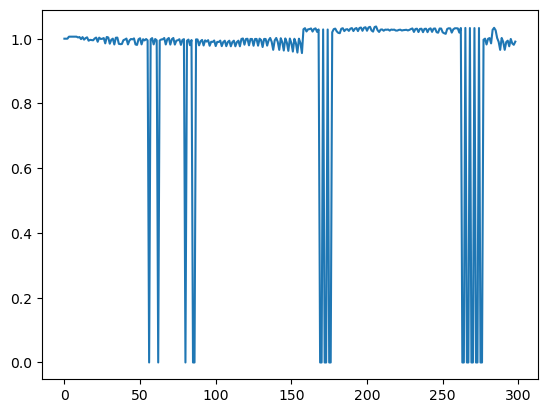

In [3]:
import numpy as np
import pandas as pd
from py_dss_interface import DSSDLL
import matplotlib.pyplot as plt



# Initialize OpenDSS
dss = DSSDLL(r"C:\Program Files\OpenDSS")
dss_file = r"D:\Alaa_Selim\123Bus\IEEE123Master.dss"
dss.text(f"compile [{dss_file}]")

# Define bus names in the IEEE 123 Node Test Feeder
bus_names = [str(i) for i in range(1, 124)]
total_buses = len(bus_names)

# Defined buses for PV placement
buses = [27, 114, 113, 112, 111, 110, 71, 70, 69, 26, 36, 37, 1, 7, 8, 13, 52, 18, 21, 23, 25, 28, 29, 30, 53, 35, 40, 54, 55, 56]

# Define PV systems based on the specified buses
for i, bus_num in enumerate(buses, start=1):  # 30 PVs
    pv_name = f"PV{i}"
    bus_name = str(bus_num)  # Fetching bus name from the buses list
    dss.text(f"new PVSystem.{pv_name} Phases=3 kV=4.16 kVA=120 Pmpp=100 Bus1={bus_name} EffCurve=Eff P-TCurve=FatorPvsT %Pmpp=100 Temperature=25 irradiance=1 ")

    
dss.text(f"New InvControl.VoltVar mode=VOLTVAR voltage_curvex_ref=rated vvc_curve1=generic  deltaQ_factor=0.2 RefReactivePower=VARMAX")  

# Define a single storage battery
#dss.text(f"new Storage.Battery1 Phases=3 kV=4.16 kVA=100 kWhRated=200")

# Perform power flow and count voltage violations
dss.text("Solve")

voltages = dss.circuit_all_bus_vmag_pu()
voltage_violations = sum(1 for v in voltages if (v < 0.95 or v > 1.05) and v != 0)
plt.plot(voltages)
print(f"Number of voltage violations: {voltage_violations}")


In [ ]:
import torch

print("Torch version:",torch.__version__)

print("Is CUDA enabled?",torch.cuda.is_available())

In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available! PyTorch is using GPU:", torch.cuda.get_device_name(0))

    # Get the current cuda device
    current_device = torch.cuda.current_device()
    print("Current device:", current_device)

    # Get the number of GPU devices available
    num_devices = torch.cuda.device_count()
    print("Number of devices available:", num_devices)

    # Get the name of the current device
    device_name = torch.cuda.get_device_name(current_device)
    print("Device name:", device_name)

    # Additional information, like memory allocated, can be retrieved like this
    memory_allocated = torch.cuda.memory_allocated(current_device)
    memory_cached = torch.cuda.memory_reserved(current_device)
    print("Memory Allocated (bytes):", memory_allocated)
    print("Memory Cached (bytes):", memory_cached)

else:
    print("CUDA is not available. PyTorch is using CPU.")

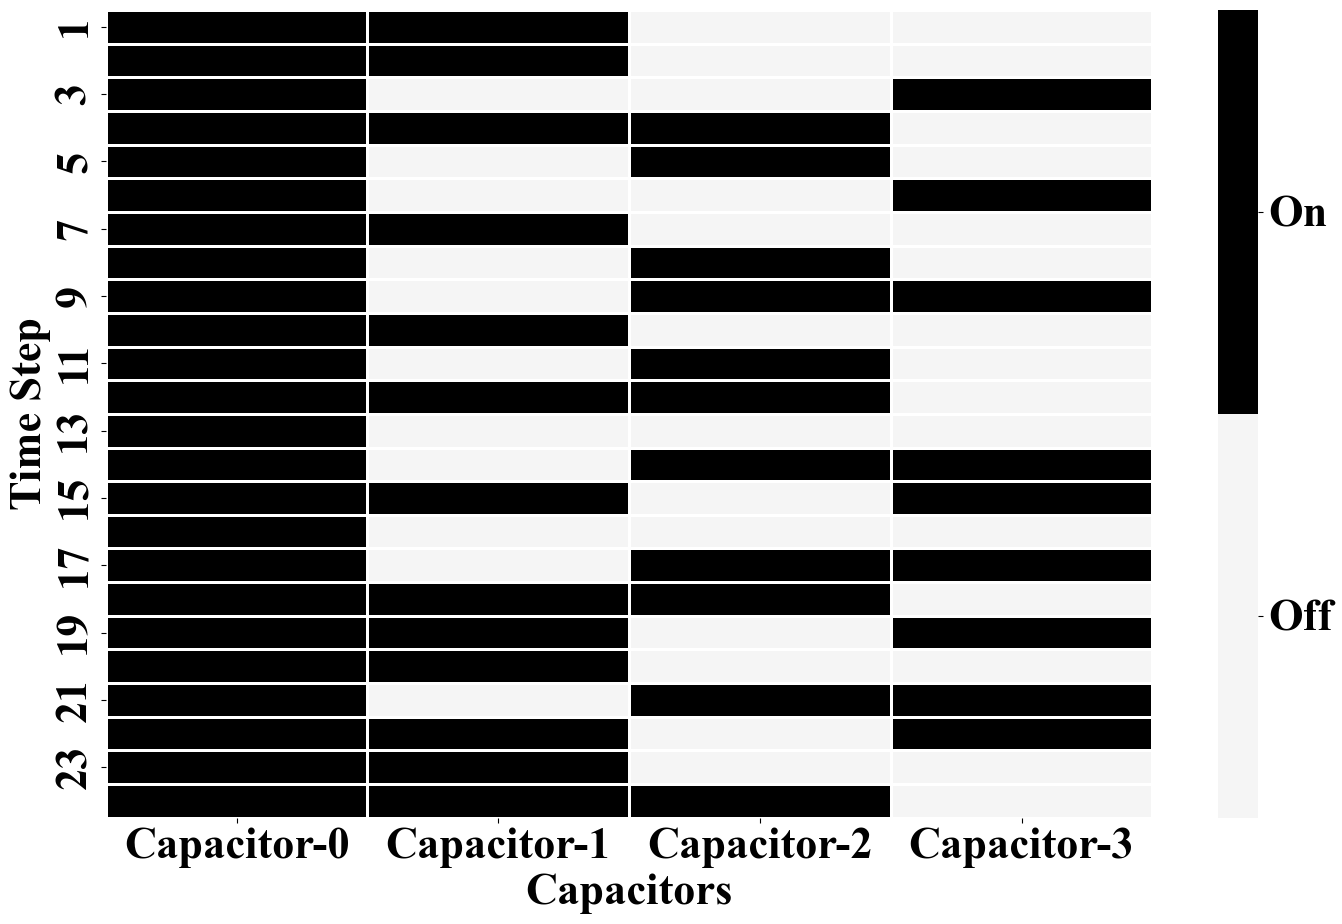

('Capacitors_L1.25_VVC.csv', 'Capacitor_Status_L1.25_VVC.pdf')

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Customizing matplotlib font settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 32  # Adjusted for all text

# New sample data provided
data_dict = {
    'Time': range(1, 25),
    'Capacitor-0': [1, 1, 1, 1, 1, 0.89003813, 1, 1, 1, 1, 1, 0.735096, 0.77029234, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Capacitor-1': [1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0.24275285, 0.13868266, 1, 1, 1, 0, 1, 1, 0.7033514],
    'Capacitor-2': [0, 0, 0, 1, 1, 0, 0, 0.5333235, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
    'Capacitor-3': [0, 0.15223292, 1, 0, 0, 1, 0, 0, 1, 0, 0.08371884, 0.46452278, 0, 1, 1, 0, 1, 0.19299546, 1, 0, 1, 1, 0, 0]
}

# Create DataFrame
data = pd.DataFrame(data_dict)

# Set the first column as index
data.set_index('Time', inplace=True)

# Round values to 1 or 0
data = data.round().astype(int)

# Define a color palette that is visually clear for "on/off" states.
# Here, we use black for 'On' and off-white for 'Off'.
colors = ["#f5f5f5", "black"]  # Off-white for 'Off' (0), Black for 'On' (1)
cmap = sns.color_palette(colors)

# Create a heatmap
plt.figure(figsize=(15, 10))  # You might need to adjust the size depending on your dataset
ax = sns.heatmap(data, cmap=cmap, cbar_kws={'ticks': [0, 1]}, linecolor='white', linewidths=1)

# Create a colorbar legend
colorbar = ax.collections[0].colorbar
# Define the labels you want
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['Off', 'On'])  # 'Off' for off-white, 'On' for black

# Add title and labels (optional)
plt.xlabel('Capacitors', fontweight='bold', fontsize=32)
plt.ylabel('Time Step', fontweight='bold', fontsize=32)

# Show plot with a tight layout
plt.tight_layout()

# Save the figure (specify the path where you want to save the PDF)
pdf_file_path = 'Capacitor_Status_L1.25_VVC.pdf'
plt.savefig(pdf_file_path, format='pdf', bbox_inches='tight')

# Show plot
plt.show()

# Save the data to CSV (specify the path where you want to save the CSV file)
csv_file_path = 'Capacitors_L1.25_VVC.csv'
data.to_csv(csv_file_path, index=False)

csv_file_path, pdf_file_path